In [2]:
from datasets import load_dataset
from src.utils import linearise_input
import csv
import matplotlib.pyplot as plt

/home/james/CodingProjects/Local_level_model_explanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("james-burton/textual-explanations")

dataset = dataset.map(
        lambda x: linearise_input(x, 'ord_first', 100, True),
        ) 
train = dataset['train']

Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 661.70it/s]
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-f5fc54edbbba4b55.arrow
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-fc479ca87a0f997f.arrow
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a

[]

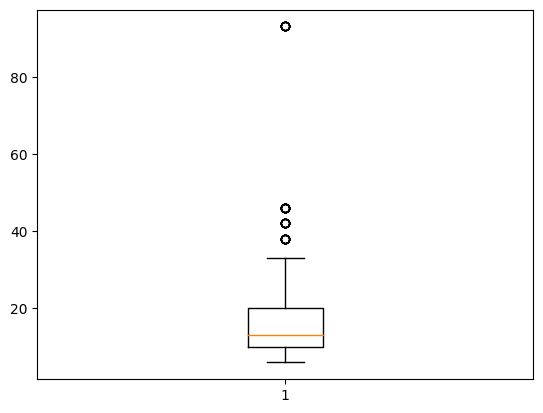

In [4]:
plt.boxplot([len(fts) for fts in dataset['train']['feature_nums']])
plt.plot()


In [9]:
sum([len(fts)>50 for fts in dataset['train']['feature_nums']])/len(dataset['train']['feature_nums'])

0.021333333333333333

In [10]:
train[10]['narration']

"The model's output labelling judgement for the case under consideration is as follows: C2 cannot be the label for the given case; C1 is the most likely class label with a 100.0% confidence level. The key driving factors resulting in the aforementioned classification are the values of the input features: F38, F51, F13, F46, F28, F71, and F44. F70, F61, F85, F20, F59, F93, F14, F66, F24, F89, F30, F65, and F54 are the features that have a modest effect on the decision. Aside from the aforementioned input features, all others, such as F47, F10, F7, and F43, are revealed to be irrelevant to the conclusion reached here. Not all of the influential features support labelling the current instance as C1, and they are referred to as negative features. F44, F61, F30, F65, and F54 are the negative attributes that diminish the likelihood that C1 is the correct label in this case. F38, F51, F13, and F46 are important positive features that strongly increase the likelihood that C1 is the correct lab

In [12]:
train[10]['narrative_questions']

["For this test instance, provide information on the predicted label along with the confidence level of the model's decision.",
 "Summarize the top features influencing the model's decision along with the respective directions of influence on the prediction?",
 'Summarize the direction of influence of the features (F28, F44 and F71) with moderate impact on the prediction made for this test case.']

In [24]:
train[10]['feature_nums']

['F38',
 'F51',
 'F13',
 'F46',
 'F28',
 'F44',
 'F71',
 'F70',
 'F61',
 'F85',
 'F59',
 'F20',
 'F93',
 'F14',
 'F66',
 'F24',
 'F89',
 'F30',
 'F65',
 'F54',
 'F47',
 'F10',
 'F7',
 'F43',
 'F87',
 'F42',
 'F83',
 'F17',
 'F41',
 'F40',
 'F23',
 'F18',
 'F1',
 'F34',
 'F32',
 'F77',
 'F67',
 'F52',
 'F6',
 'F64',
 'F73',
 'F12',
 'F9',
 'F69',
 'F37',
 'F35',
 'F84',
 'F19',
 'F36',
 'F45',
 'F15',
 'F81',
 'F76',
 'F22',
 'F57',
 'F21',
 'F63',
 'F53',
 'F58',
 'F92',
 'F88',
 'F50',
 'F26',
 'F62',
 'F56',
 'F49',
 'F8',
 'F39',
 'F74',
 'F86',
 'F72',
 'F25',
 'F68',
 'F2',
 'F91',
 'F80',
 'F78',
 'F3',
 'F60',
 'F4',
 'F5',
 'F75',
 'F82',
 'F90',
 'F27',
 'F55',
 'F11',
 'F48',
 'F16',
 'F29',
 'F33',
 'F79',
 'F31']

In [25]:
import json
import re
# random.seed(42)

all_train = json.load(open('raw_data/all_train.json',encoding='utf-8'))
test = json.load(open('raw_data/test_set_new.json',encoding='utf-8'))
all = all_train + test
no_task = [x for x in all if x.get('task_name', None) == None]
all = [x for x in all if x.get('task_name', None) != None]

sign_dict = {'red': 'negative', 'green': 'positive', 'yellow': 'negligible'}

for i in range(len(all)):
    # Some of the data is in string form, eval() is to convert it to dict
    try:
        all[i]['feature_division'] = eval(all[i]['feature_division'])
    except:
        all[i]['feature_division'] = all[i]['feature_division']
    all[i]['feature_division']['explainable_df'] = eval(all[i]['feature_division']['explainable_df'])
    
    # Some of the fields we want are inside the feature_division dict, moving them to the top level
    all[i]['values'] = [format(val, '.2f') for val in all[i]['feature_division']['explainable_df']['Values'].values()]
    ft_nums =[re.search('F\d*', val).group() for val in list(all[i]['feature_division']['explainable_df']['annotate_placeholder'].values())]
    ft_names = list(all[i]['feature_division']['explainable_df']['Variable'].values())
    all[i]['sign'] = [sign_dict[x] for x in all[i]['feature_division']['explainable_df']['Sign'].values()]
    all[i]['narrative_id'] = all[i].pop('id')
    all[i]['unique_id'] = i
    all[i]['classes_dict'] = {v[0].strip(): v[1].strip() for v in [y.split(':') for y in [x for x in all[i]['prediction_confidence_level'].split(',')]]}
    all[i]['narrative_questions'] = all[i]['narrative_question'].strip('<ul><li>/ ').split(' </li> <li> ')

In [27]:
all[0]

{'model_name': 'LogisticRegression',
 'deleted': False,
 'mturk_id': 'Basic',
 'predicted_class': 'C1',
 'narrative_status': 1,
 'predicted_class_label': 'dissatisfied',
 'date_submitted': '06/10/2021',
 'feature_division': {'rank': [['<|f#3|>', 0],
   ['<|f#4|>', 1],
   ['<|f#6|>', 2],
   ['<|f#12|>', 3],
   ['<|f#11|>', 4],
   ['<|f#14|>', 5],
   ['<|f#13|>', 6],
   ['<|f#9|>', 7],
   ['<|f#10|>', 8],
   ['<|f#15|>', 9],
   ['<|f#5|>', 10],
   ['<|f#7|>', 11],
   ['<|f#2|>', 12],
   ['<|f#8|>', 13],
   ['<|f#1|>', 14]],
  'annotate_code': ['F3-V0',
   'F4-V0',
   'F6',
   'F12',
   'F11',
   'F14',
   'F13',
   'F9',
   'F10',
   'F15',
   'F5',
   'F7',
   'F2-V0',
   'F8',
   'F1-V0'],
  'explainable_df': {'Values': {'2': -0.2954524482,
    '3': -0.2525100076,
    '5': 0.2296850087,
    '11': 0.1492687389,
    '10': 0.0917511915,
    '13': 0.0863306218,
    '12': -0.0746328313,
    '8': 0.065316989,
    '9': -0.0643314259,
    '14': 0.0543745922,
    '4': 0.047533335,
    '6': 0.01